In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [2]:
df = pd.read_csv('FIFA_data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.shape

(18207, 89)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

<AxesSubplot:>

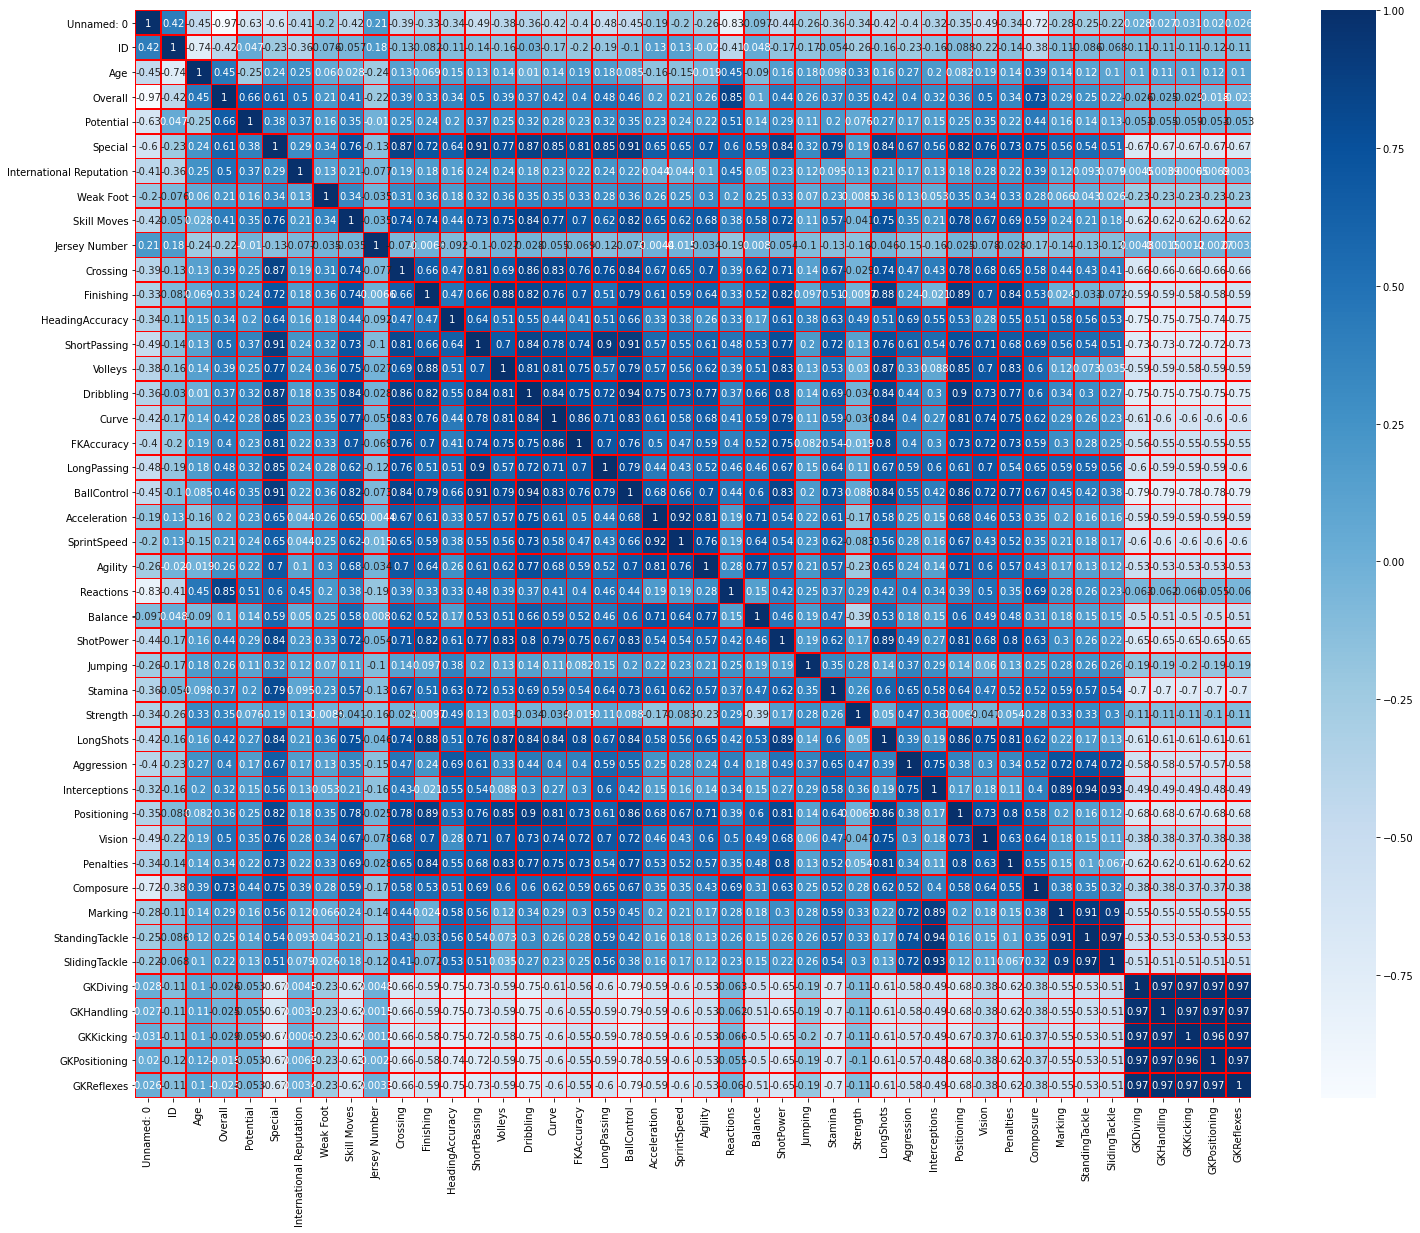

In [7]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),cmap='Blues',annot=True,linewidths=0.5,linecolor='r')

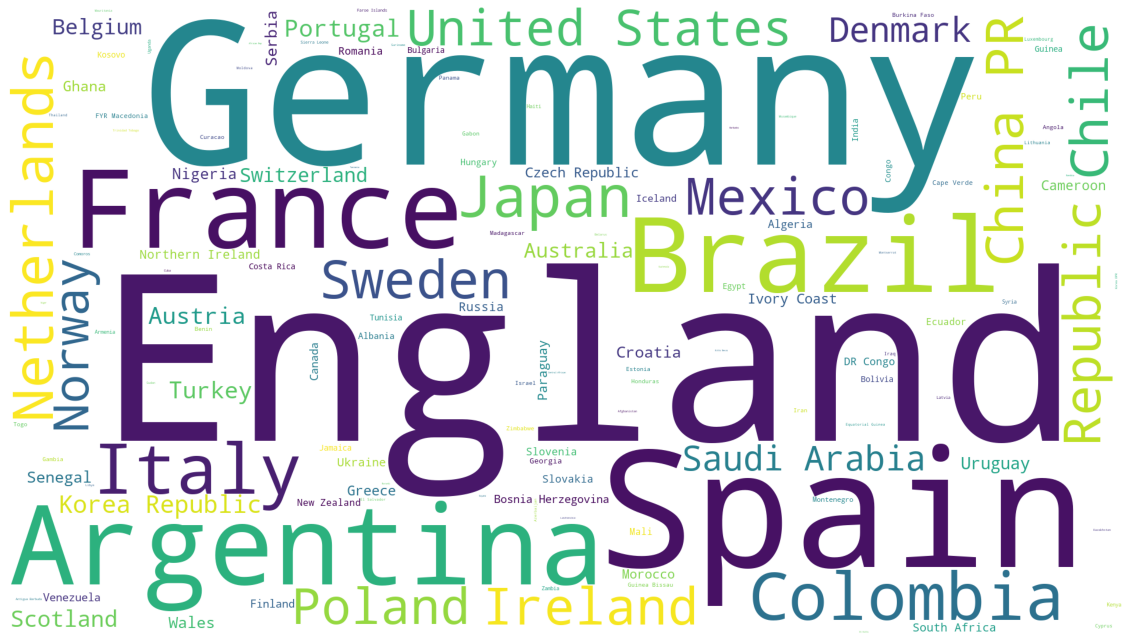

In [8]:
fig = plt.figure(figsize=(20,15))
wc = WordCloud(background_color='white',width=1920,height=1080).generate(' '.join(df.Nationality))
plt.imshow(wc)
plt.axis('off')
plt.savefig('Nationality_WordCloud.png')

In [9]:
df['Club'].fillna('No Club',inplace=True)
df['Position'].fillna('ST',inplace=True)

In [10]:
to_impute_by_mean = df.loc[:,['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

In [11]:
for i in to_impute_by_mean.columns:
    df[i].fillna(df[i].mean(),inplace=True)

In [12]:
to_impute_by_mode = df.loc[:,['Body Type','International Reputation','Height','Weight','Preferred Foot','Jersey Number']]

In [13]:
for i in to_impute_by_mode.columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [14]:
to_impute_by_median = df.loc[:,['Weak Foot','Skill Moves']]

for i in to_impute_by_median.columns:
    df[i].fillna(df[i].median(),inplace=True)

In [15]:
df.columns[df.isna().any()]

Index(['Work Rate', 'Real Face', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

In [16]:
df.fillna(0,inplace=True)

In [17]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [18]:
def defending(df):
    return int(round((df[['Marking', 'StandingTackle','SlidingTackle']].mean()).mean()))

def general(df):
    return int(round((df[['HeadingAccuracy', 'Dribbling', 'Curve','BallControl']].mean()).mean()))

def mental(df):
    return int(round((df[['Aggression', 'Interceptions', 'Positioning','Vision','Composure']].mean()).mean()))

def passing(df):
    return int(round((df[['Crossing', 'ShortPassing','LongPassing']].mean()).mean()))

def mobility(df):
    return int(round((df[['Acceleration', 'SprintSpeed','Agility','Reactions']].mean()).mean()))
def power(df):
    return int(round((df[['Balance', 'Jumping', 'Stamina','Strength']].mean()).mean()))

def rating(df):
    return int(round((df[['Potential', 'Overall']].mean()).mean()))

def shooting(df):
    return int(round((df[['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [19]:
df.rename(columns={'Club Logo':'Club_Logo'},inplace=True)

In [20]:
df['Defending'] = df.apply(defending, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

In [21]:
players = df[['Name','Defending','General','Mental','Passing','Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]
players.head()

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club_Logo,Club
0,L. Messi,29,89,71,87,91,74,94,88,https://cdn.sofifa.org/flags/52.png,31,Argentina,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,https://cdn.sofifa.org/flags/38.png,33,Portugal,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus
2,Neymar Jr,28,85,72,80,94,69,92,84,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain
3,De Gea,16,26,43,39,66,54,92,21,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City


C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Different positions in Football Players')

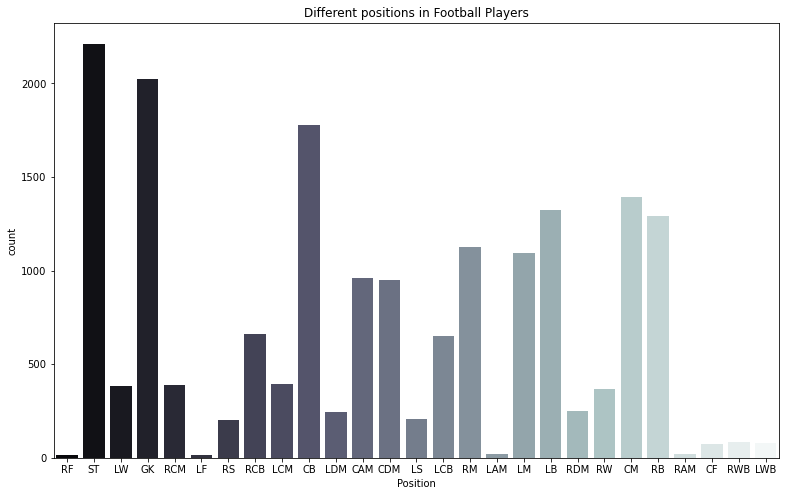

In [22]:
plt.figure(figsize=(13,8))
ax=sns.countplot(df['Position'],palette='bone')
ax.set_title('Different positions in Football Players')

C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Height of Players')

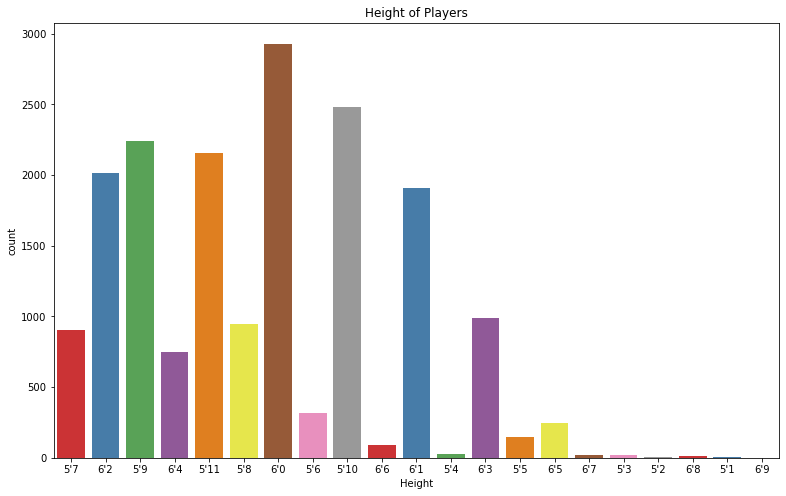

In [23]:
plt.figure(figsize=(13,8))
ax=sns.countplot(df['Height'],palette='Set1')
ax.set_title('Height of Players')

C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Work Rate of Players')

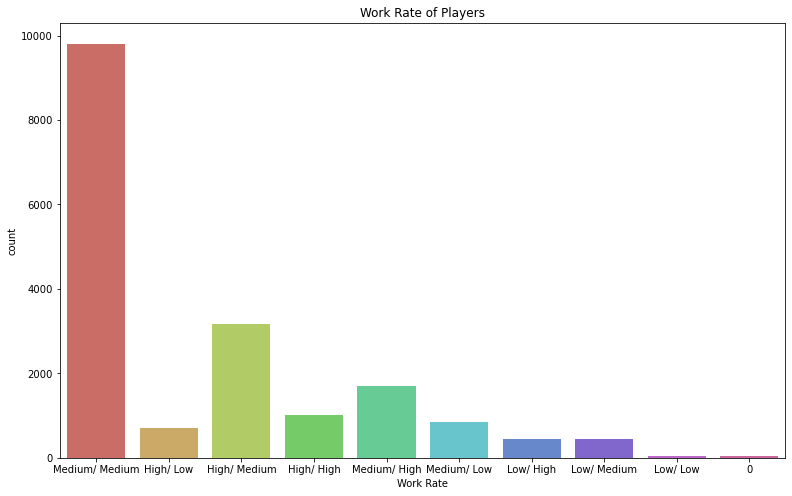

In [24]:
plt.figure(figsize=(13,8))
ax=sns.countplot(df['Work Rate'],palette='hls')
ax.set_title('Work Rate of Players')

C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Special'>

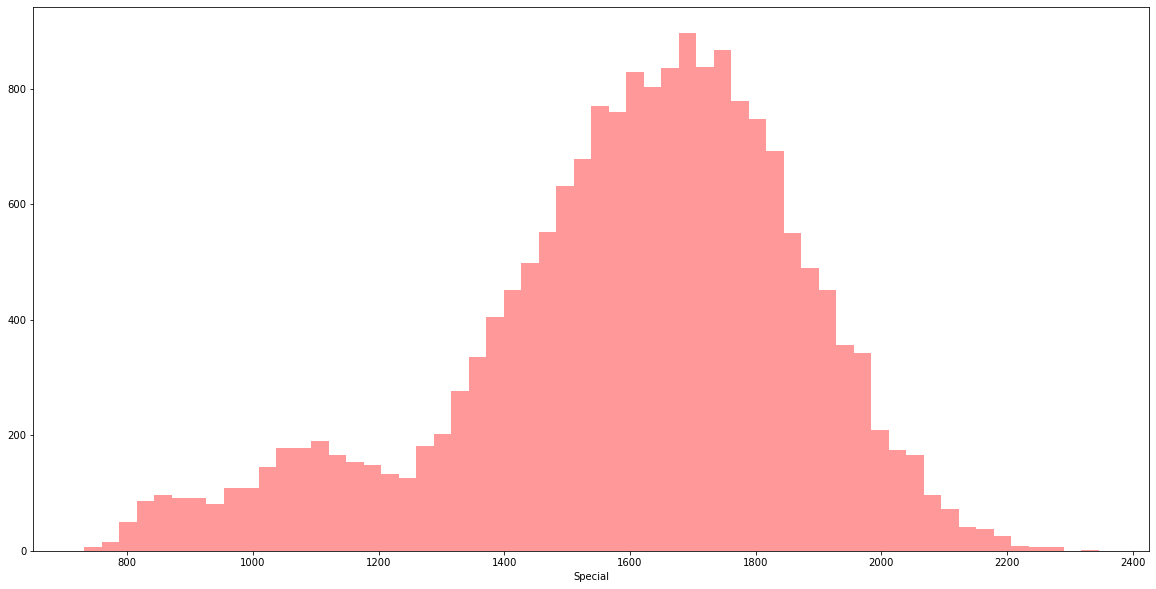

In [25]:
plt.figure(figsize=(20,10))
sns.distplot(df['Special'],kde=False,color='red',bins=58)

In [26]:
some_countries = ('England','Germany','Spain','Argentina','France','Brazil','Italy','Columbia')
data_countries = df.loc[df['Nationality'].isin(some_countries) & df['Overall']]
data_countries.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,94.0,€138.6M,16,26,43,39,66,54,92,21
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,11.0,€104.6M,90,78,77,74,78,82,91,68
14,14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,...,10.0,€121.3M,89,66,83,78,84,85,90,61
15,15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,...,8.0,€153.5M,21,85,67,81,87,76,92,86
16,16,202126,H. Kane,24,https://cdn.sofifa.org/players/4/19/202126.png,England,https://cdn.sofifa.org/flags/14.png,89,91,Tottenham Hotspur,...,11.0,€160.7M,43,82,75,79,76,80,90,85


C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nationality', ylabel='Overall'>

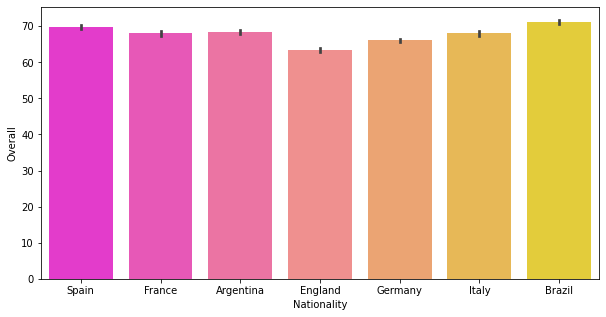

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(data_countries['Nationality'],data_countries['Overall'],palette='spring')

In [28]:
df['Club'].value_counts().head(10)

No Club              241
Everton               33
Manchester City       33
Cardiff City          33
RC Celta              33
Manchester United     33
Frosinone             33
Rayo Vallecano        33
Tottenham Hotspur     33
AS Monaco             33
Name: Club, dtype: int64

In [29]:
data = df.copy()
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,8.0,€226.5M,29,89,71,87,91,74,94,88
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,11.0,€127.1M,27,88,73,81,91,83,94,88
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,94.0,€138.6M,16,26,43,39,66,54,92,21
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,13.0,€196.4M,59,79,81,92,81,76,92,85


In [30]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')
data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]
data_clubs.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,8.0,€172.1M,28,83,72,84,92,75,91,82
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,9.0,€137.4M,70,81,80,89,84,77,91,78
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,37.0,€164M,48,85,78,74,84,81,91,87
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,11.0,€104.6M,90,78,77,74,78,82,91,68
14,14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,...,10.0,€121.3M,89,66,83,78,84,85,90,61


C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Club', ylabel='Overall'>

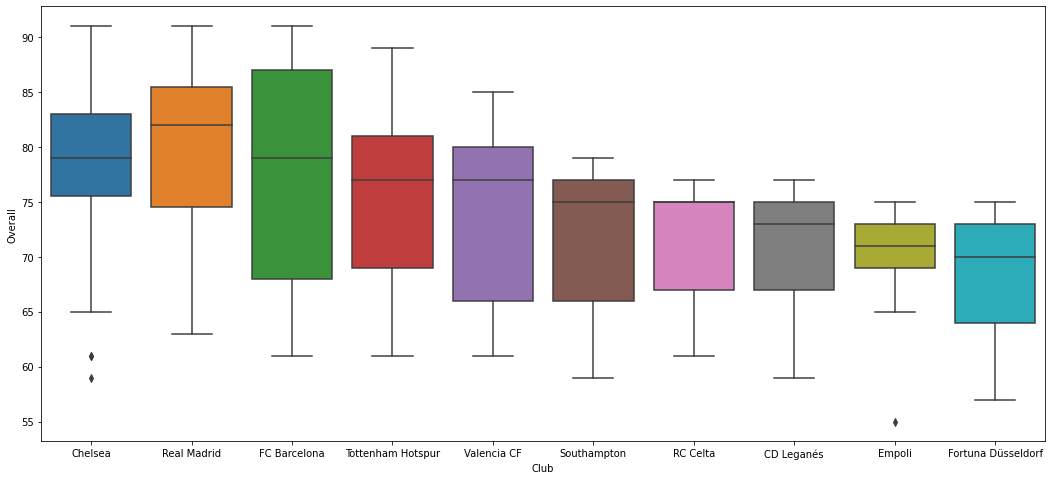

In [31]:
plt.figure(figsize=(18,8))
sns.boxplot(data_clubs['Club'],data_clubs['Overall'])

In [32]:
left = data[data['Preferred Foot']=='Left'][['Name','Age','Club','Nationality']]
left.head()

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium


In [33]:
right = data[data['Preferred Foot']=='Right'][['Name','Age','Club','Nationality']]
right.head()

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium


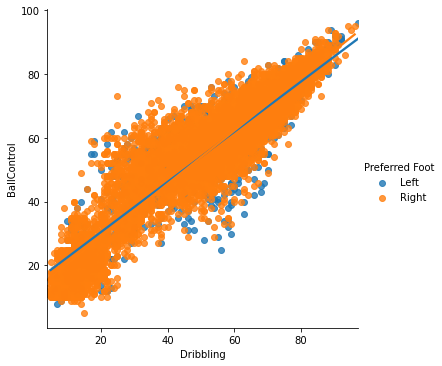

In [34]:
sns.lmplot(x='Dribbling',y='BallControl',data=data,hue='Preferred Foot')

In [35]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending=False).head(10)

Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
West Ham United           18
Empoli                    18
AS Monaco                 18
Eintracht Frankfurt       18
Lazio                     18
Napoli                    18
Name: Nationality, dtype: int64

In [36]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending=True).head(10)

Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64

In [37]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [38]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_Logo,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,8.0,€226.5M,29,89,71,87,91,74,94,88
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,11.0,€127.1M,27,88,73,81,91,83,94,88
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,94.0,€138.6M,16,26,43,39,66,54,92,21
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,13.0,€196.4M,59,79,81,92,81,76,92,85


In [63]:
str(df.loc[df['Potential'].idxmax()][1])

'K. Mbappé'

In [53]:
print('Maximum Potential:',str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Performance:',str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential: K. Mbappé
Maximum Overall Performance: L. Messi


In [58]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys','Dribbling', 'Curve', 'FKAccuracy','LongPassing',
         'BallControl','Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance','ShotPower', 'Jumping', 'Stamina', 
         'Strength', 'LongShots','Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties','Composure', 'Marking', 
         'StandingTackle', 'SlidingTackle', 'GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i +=1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


In [59]:
i=0
best = []
while i < len(pr_cols):
    best.append(df.loc[df[pr_cols[i]].idxmax()][1])
    i+=1
print(best)

['K. De Bruyne', 'L. Messi', 'Naldo', 'L. Modrić', 'E. Cavani', 'L. Messi', 'Quaresma', 'L. Messi', 'T. Kroos', 'L. Messi', 'Douglas Costa', 'K. Mbappé', 'Neymar Jr', 'Cristiano Ronaldo', 'Bernard', 'Cristiano Ronaldo', 'Cristiano Ronaldo', 'N. Kanté', 'A. Akinfenwa', 'L. Messi', 'B. Pearson', 'N. Kanté', 'Cristiano Ronaldo', 'L. Messi', 'M. Balotelli', 'L. Messi', 'A. Barzagli', 'G. Chiellini', 'Sergio Ramos', 'De Gea', 'J. Oblak', 'M. Neuer', 'G. Buffon', 'De Gea']


C:\Users\AKSHY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

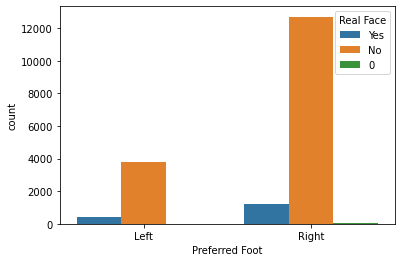

In [61]:
sns.countplot(df['Preferred Foot'],hue=df['Real Face'])

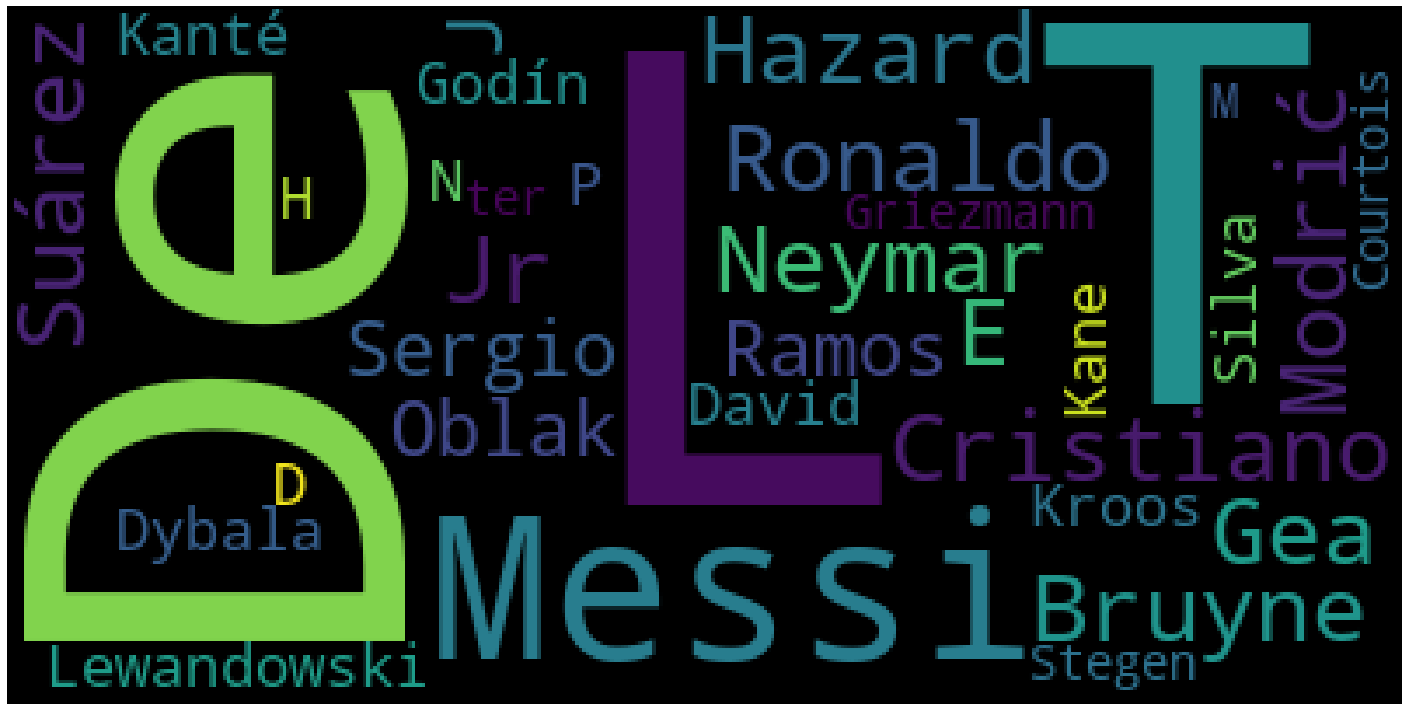

In [73]:
plt.figure(figsize=(25,15))
wc = WordCloud().generate(' '.join(df.Name[0:20]))
plt.imshow(wc)
plt.axis('off')
plt.savefig('players.png')

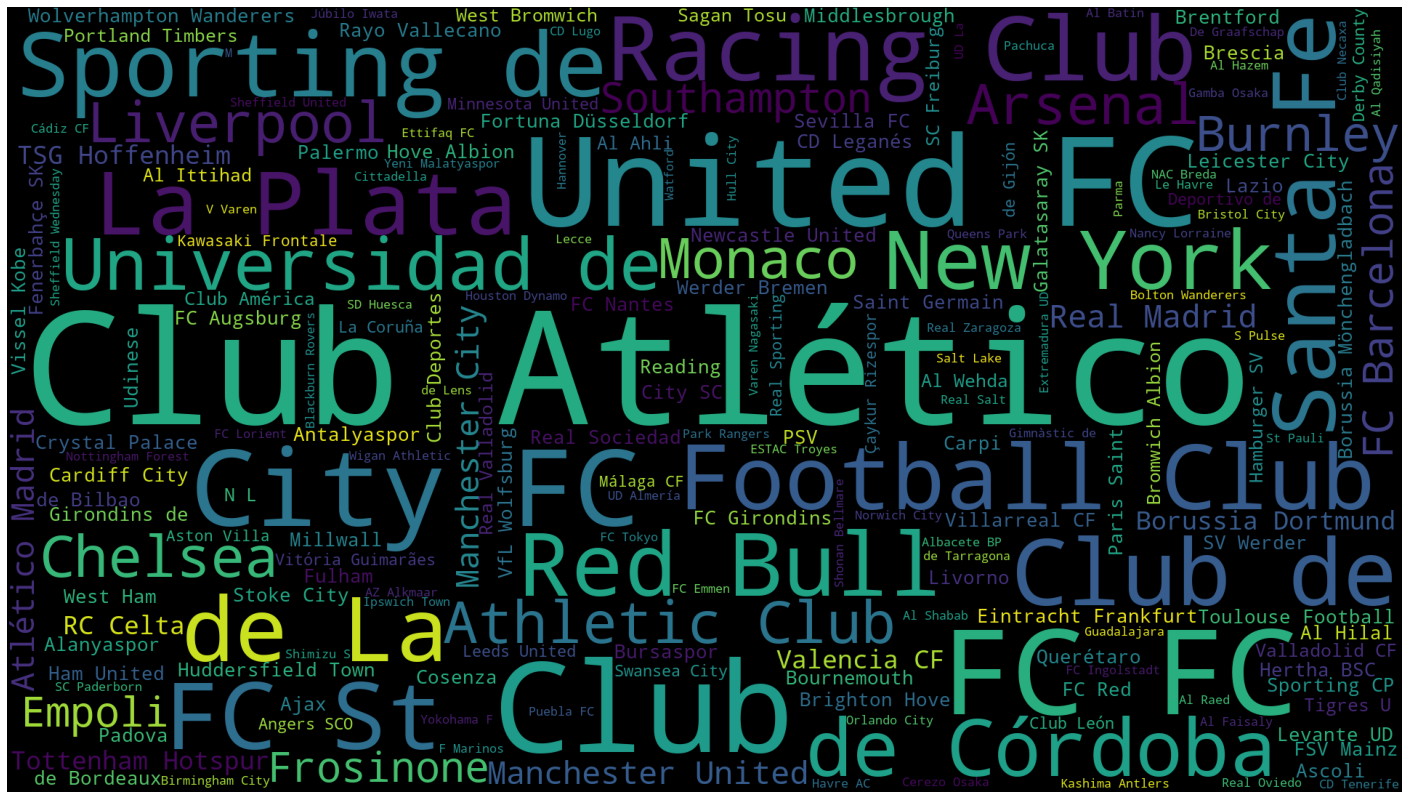

In [75]:
plt.figure(figsize=(25,15))
wc = WordCloud(width=1920,height=1080).generate(' '.join(df.Club))
plt.imshow(wc)
plt.axis('off')
plt.savefig('club.png')

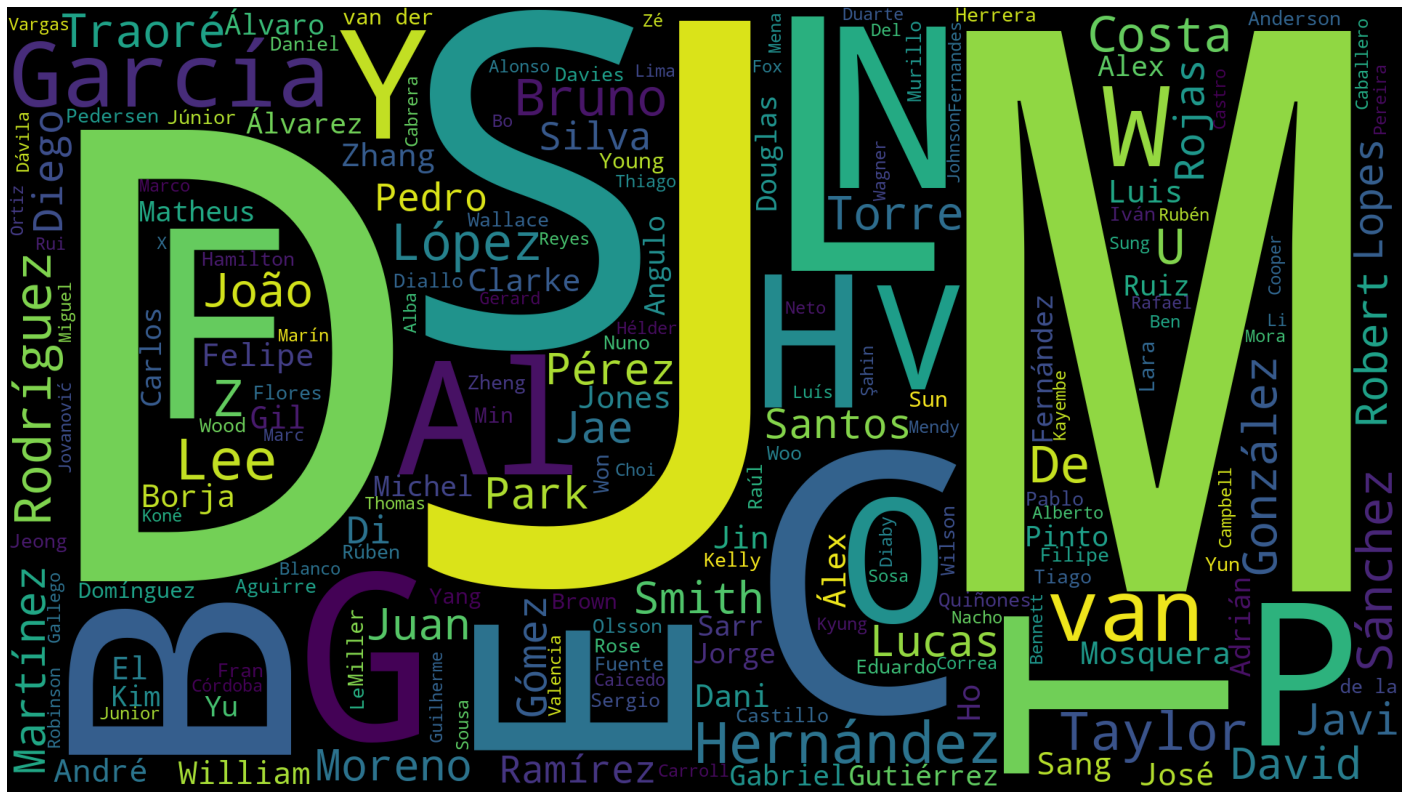

In [79]:
plt.figure(figsize=(25,15))
wc = WordCloud(width=1920,height=1080).generate(' '.join(left.Name))
plt.imshow(wc)
plt.axis('off')
plt.savefig('lefties.png')

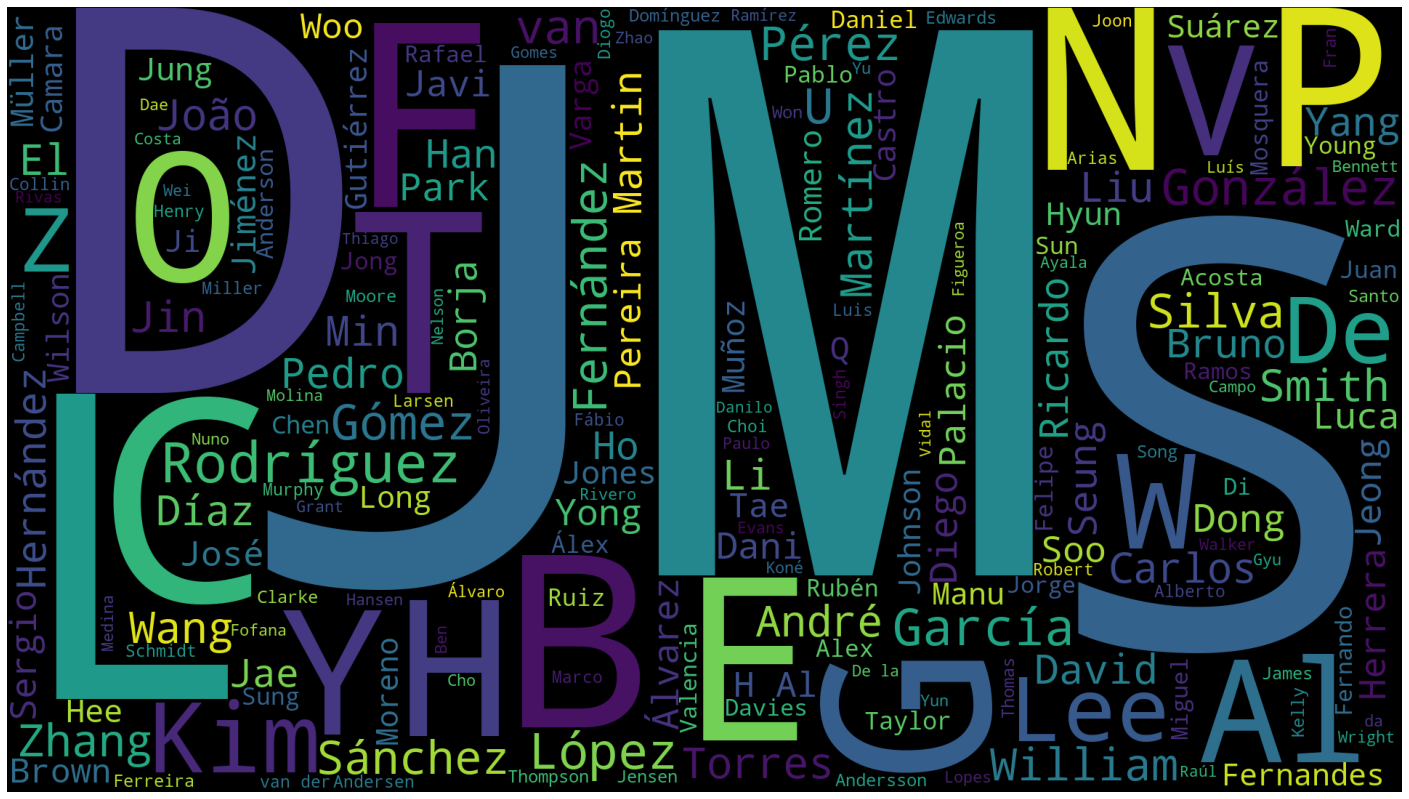

In [80]:
plt.figure(figsize=(25,15))
wc = WordCloud(width=1920,height=1080).generate(' '.join(right.Name))
plt.imshow(wc)
plt.axis('off')
plt.savefig('righties.png')

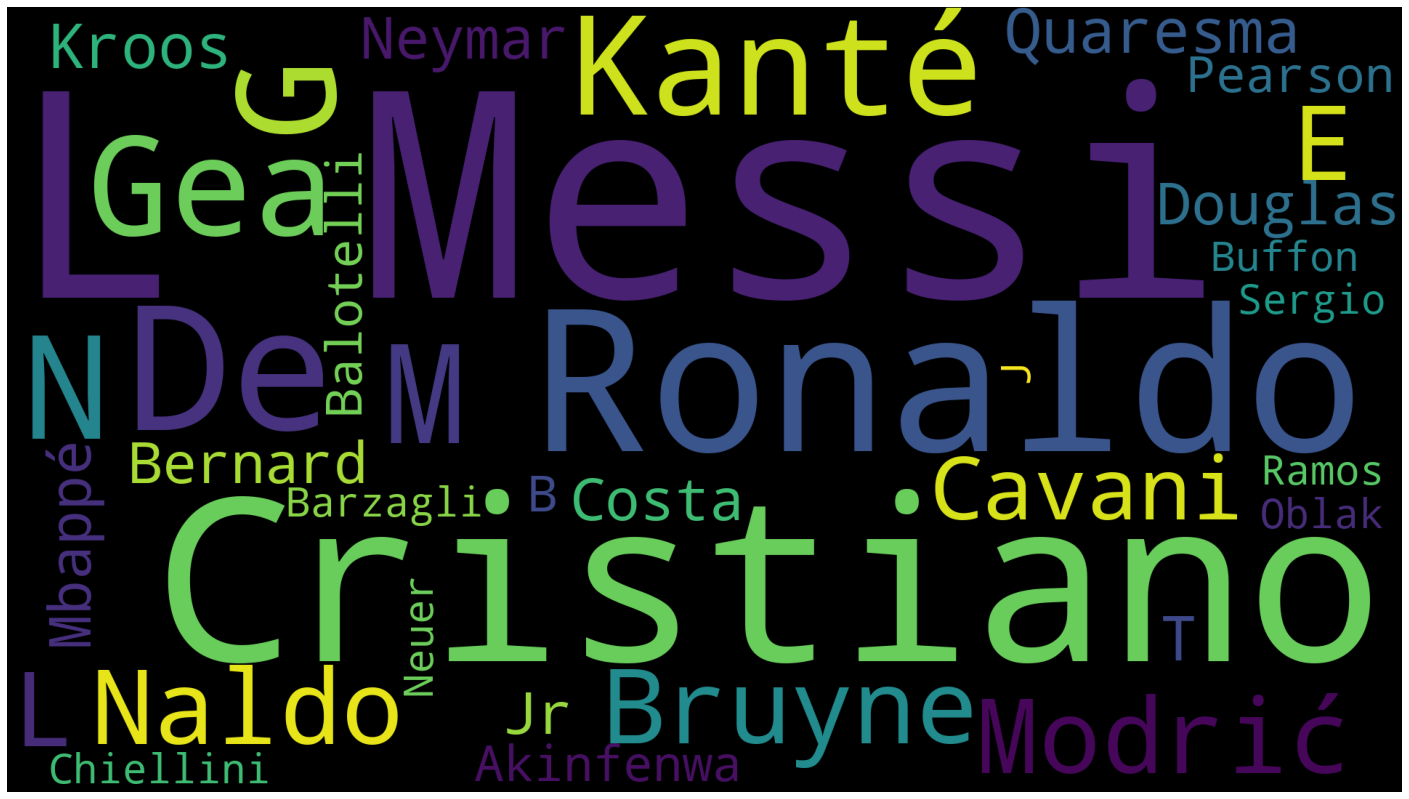

In [81]:
plt.figure(figsize=(25,15))
wc = WordCloud(width=1920,height=1080).generate(' '.join(best))
plt.imshow(wc)
plt.axis('off')
plt.savefig('best_players.png')